In [2]:
import pandas as pd
import os
from tqdm.notebook import tqdm

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sliit-datathon-2023/full_data.csv
/kaggle/input/sliit-datathon-2023/full_data.parquet


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset

In [39]:
df = pd.read_parquet("/kaggle/input/sliit-datathon-2023/full_data.parquet")
df = df.set_index('event_id', drop=True)
df.head()

,session_id,transaction_date,event_type_id,product_id,title_product_id,country_code_id,ip_address,auth_session_id
event_id,,,,,,,,
0,3507032552,2020-08-20,4,63795519,63077424,162,238.108.111.146,2668673246
1,3506994387,2020-08-20,5,193402914,63110659,148,32.129.93.188,2668641289
2,3507038875,2020-08-20,5,202835637,63108769,517,222.60.132.210,2668676616
3,3507038876,2020-08-20,7,63109557,63109558,351,22.28.25.247,2668676617
4,3507036177,2020-08-20,4,69817018,63129191,162,138.169.123.254,2668677577


# Value count for each column

In [34]:
val=[]
col=[]
for col_name in df.columns:
    val.append(len(df[col_name]) - df[col_name].isna().sum())
    col.append(col_name)
    print(col_name, ":",len(df[col_name]) - df[col_name].isna().sum())

session_id : 6044797
transaction_date : 6044797
event_type_id : 6043230
product_id : 6044797
title_product_id : 6044797
country_code_id : 6044462
ip_address : 6044797
auth_session_id : 5958585


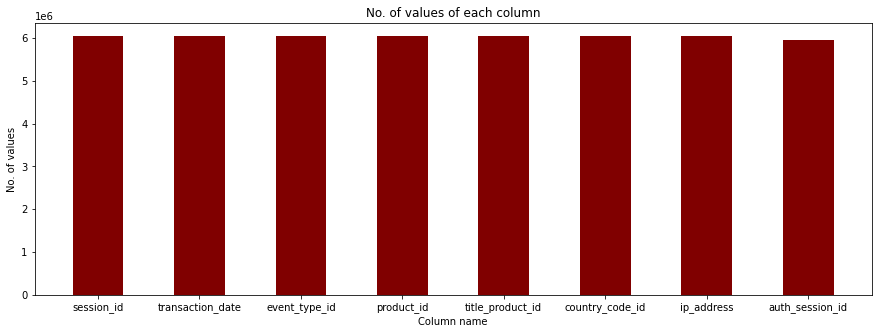

In [35]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(col, val, color ='maroon',
        width = 0.5)
 
plt.title("No. of values of each column")
plt.xlabel('Column name');
plt.ylabel('No. of values');
plt.show()

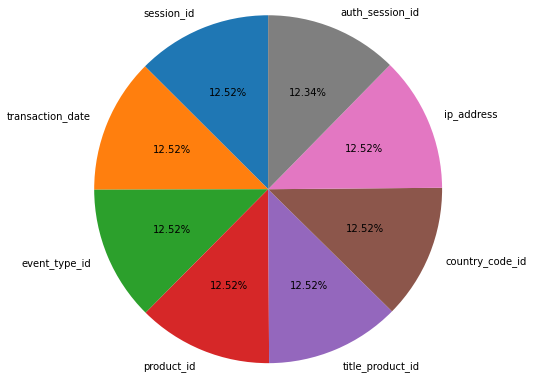

In [37]:
plt.pie(
   val,
    startangle = 90,
    autopct = '%0.2f%%',
    labels = col,
    radius = 2
  )
plt.legend(val, loc='center left', bbox_to_anchor=(-0.8, .5), fontsize=8)
plt.show()

# Unique value count for each column

In [38]:
unique_count=[]
for col in df.columns:
    unique_count.append(len(df[col].unique()))
    print(col, ":",len(df[col].unique()))

session_id : 3586748
transaction_date : 86400
event_type_id : 27
product_id : 2008439
title_product_id : 21187
country_code_id : 313
ip_address : 1130066
auth_session_id : 3213232


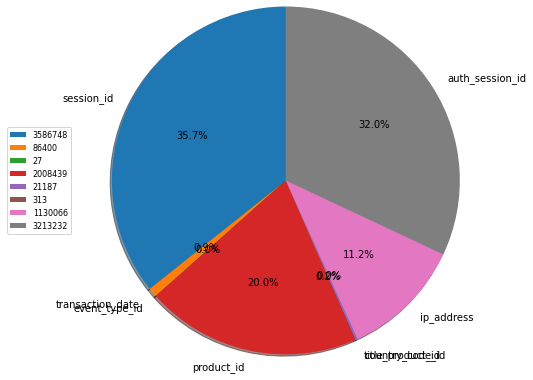

In [64]:
plt.pie(
   unique_count,
    startangle = 90,
    autopct = '%0.1f%%',
    labels = df.columns,
    radius = 2,
    shadow=True
  )
plt.legend(unique_count, loc='center left', bbox_to_anchor=(-0.8, .5), fontsize=8)

plt.show()

# Null Values

In [57]:
df.isna().sum()

session_id              0
transaction_date        0
event_type_id        1567
product_id              0
title_product_id        0
country_code_id       335
ip_address              0
auth_session_id     86212
dtype: int64

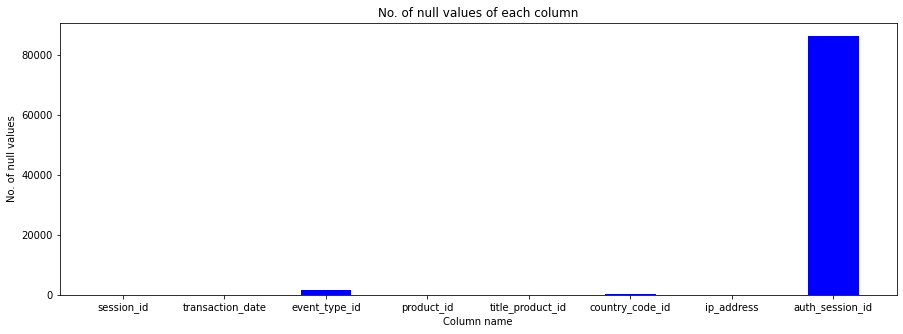

In [69]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(df.columns,df.isna().sum().values.tolist(), color ='blue',
        width = 0.5)
 
plt.title("No. of null values of each column")
plt.xlabel('Column name');
plt.ylabel('No. of null values');
plt.show()

In [67]:
# plt.pie(
#    df.isna().sum().values.tolist(),
#     startangle = 90,
#     autopct = '%0.1f%%',
#     labels = df.columns,
#     radius = 2
#   )
# plt.show()

<AxesSubplot:ylabel='event_id'>

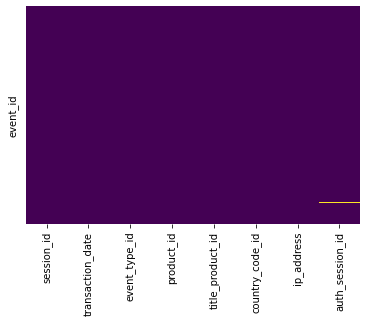

In [8]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

# Handle Null Values

In [71]:
cols_with_NaN = ["event_type_id", "country_code_id", "auth_session_id"]
for col in cols_with_NaN:
    df[col] = df[col].fillna("None")

In [72]:
for col in df.columns:
     df[col] = df[col].astype("category")

In [73]:
df.isna().sum()

session_id          0
transaction_date    0
event_type_id       0
product_id          0
title_product_id    0
country_code_id     0
ip_address          0
auth_session_id     0
dtype: int64

# event_type_id column

<AxesSubplot:>

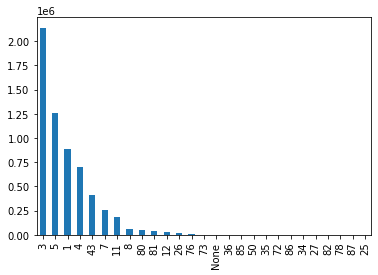

In [15]:
df['event_type_id'].value_counts().plot.bar()

# Check duplicate values

In [76]:
duplicates=df.duplicated().sum()
duplicates

55389

In [82]:
len(df)- duplicates

5989408

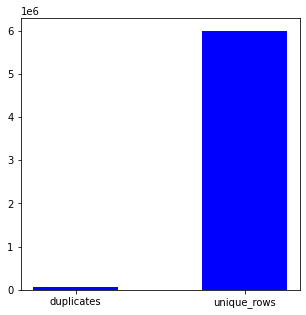

In [87]:
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(["duplicates", "unique_rows"],[duplicates,len(df)- duplicates], color ='blue',
        width = 0.5)
 

plt.show()